In [1]:
# https://fz6c5sykco.feishu.cn/docx/IiwPdoGdgogJdPxwrTwceifon3b?from=from_copylink

# 1. 硬件设备搭建(5分)

1. 相机安装(1分)
2. 镜头安装(1分)
3. 光源安装(1分)
4. 电缆安装(1分)
5. 加工夹具安装(1分)

---

# 2. 图像训练集采集(5分)

1. 上传训练样本图片(1分)
2. 采集训练样本图片(4分) >= 320张

---

# 3. 工业视觉模型训练与部署(20分)

1. 加载视觉算法训练数据集(2分)
2. 图像预处理(6分) 5种以上有效预处理方法
3. 部署视觉算法模型(2分)
4. 验证视觉算法模型(10分) 识别正确识别率：10分*识别率 识别率计算法方式：识别率 = 识别成功样本数量/测试样本总数

---

# 4. 误差算法模型训练与部署 (20分)

1. 加载误差算法训练数据集(2分)
2. 数据预处理(6分) 5种以上有效预处理方法
3. 验证误差算法模型(10分) 验证模型的MSE均方误差(值的范围为0-1)：10分*（1-MSE）
    * $MSE_i=(\sum_i^8 (y_{pred_i} - y_{true_i})^2 ) / 8 $
    * $MSE均方误差=(\sum_i^n MSE_i) / n$
    * 其中，$MSE_i$为一个样本的均方误差，$n$表示样本数量，$y_{pred_i}表示预测值$，$y_{true_i}表示真实值$，$\sum表示求和符号$
4. 误差算法模型部署(2分) 识别正确识别率：10分*识别率 识别率计算法方式：识别率 = 识别成功样本数量/测试样本总数

---

# 5. 模拟加工验证 (50分)

1. 按照指定数量加工工件得分 (50分) 
    * 裁判程序显示的模拟加工验证分数（满分100分）*50%
    * 输入裁判程序密钥，查看模拟加工验证的成绩，并按照50%进行计算。

---

In [2]:
"""
环境信息
"""
!python -V
!docker --version
!pip list

Python 3.9.18


Docker version 24.0.6, build ed223bc
Package                      Version
---------------------------- ------------
absl-py                      1.4.0
aiohttp                      3.8.4
aiosignal                    1.3.1
antlr4-python3-runtime       4.9.3
anyio                        4.0.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.2
attrs                        23.1.0
autopep8                     2.0.2
Babel                        2.13.1
bayesian-optimization        1.4.3
beautifulsoup4               4.12.2
bleach                       6.1.0
bminf                        2.0.1
boto3                        1.21.42
botocore                     1.24.46
cachetools                   5.3.1
certifi                      2023.7.22
cffi                         1.16.0
charset-normalizer           3

In [3]:
"""
基础信息
"""
# 忽略警告信息
import warnings
warnings.filterwarnings('ignore')
# 当前工作目录
import os
from loguru import logger
logger.info(os.getcwd())
# 当前tensorflow版本
import tensorflow as tf
logger.info(tf.__version__)
# # 设置tensorflow()
# tf.compat.v1.enable_eager_execution()
# for gpu in tf.config.experimental.list_physical_devices("GPU"):
#     tf.config.experimental.set_memory_growth(gpu, True)

2023-11-15 21:24:30.616 | INFO     | __main__:<module>:10 - /home/wxy/itsc2023
2023-11-15 21:24:30.763496: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 21:24:30.763527: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 21:24:30.763544: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 21:24:30.768212: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the

In [4]:
"""
Init Define 初始化定义
"""
ROOT_DIR = os.getcwd()
# 图片高度
img_height = 224
# 图片宽度
img_width = 224
# 数据文件夹
data_dir = os.path.join(ROOT_DIR, 'data')
# 模型批次大小
batch_size = 8
# 创建图片文件夹
os.makedirs('/home/wxy/itsc2023/data/images_224/good', exist_ok=True)
os.makedirs('/home/wxy/itsc2023/data/images_224/bad', exist_ok=True)

good_img_dir = '/home/wxy/itsc2023/data/images_224/good'
bad_img_dir = '/home/wxy/itsc2023/data/images_224/bad'
total_img_dir = '/home/wxy/itsc2023/data/images_224/'


In [16]:
"""
已采集图像预检
"""
from PIL import Image
import numpy as np
class_names = ['bad', 'good']
# 检查所有已读取的图片是否都为224
good_img_list = os.listdir(good_img_dir)
bad_img_list = os.listdir(bad_img_dir)
logger.info("正例图片数量：{}".format(len(good_img_list)))
logger.info("反例图片数量：{}".format(len(bad_img_list)))
logger.info("所有图片数量：{}".format(len(good_img_list) + len(bad_img_list)))

# 图片尺寸检查
good_images_size = []
for img in good_img_list:
    image = Image.open(os.path.join(good_img_dir, img))
    good_images_size.append(image.size)

good_images_size_dict = {i: good_images_size.count(i) for i in good_images_size}
logger.info("正例图片尺寸分布: {}".format(good_images_size_dict))

# 图片尺寸检查
bad_images_size = []
for img in bad_img_list:
    image = Image.open(os.path.join(bad_img_dir, img))
    bad_images_size.append(image.size)

bad_images_size_dict = {i: bad_images_size.count(i) for i in bad_images_size}
logger.info("反例图片尺寸分布: {}".format(bad_images_size_dict))

2023-11-15 21:28:18.266 | INFO     | __main__:<module>:10 - 正例图片数量：31
2023-11-15 21:28:18.266 | INFO     | __main__:<module>:11 - 反例图片数量：79
2023-11-15 21:28:18.267 | INFO     | __main__:<module>:12 - 所有图片数量：110
2023-11-15 21:28:18.269 | INFO     | __main__:<module>:21 - 正例图片尺寸分布: {(224, 224): 31}
2023-11-15 21:28:18.272 | INFO     | __main__:<module>:30 - 反例图片尺寸分布: {(224, 224): 79}


# 3. 工业视觉模型训练与部署 

## 加载视觉算法训练数据集

In [17]:
"""
创建数据集
"""
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(img_height, img_width),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomBrightness(factor=0.2),
    layers.RandomContrast(factor=0.2)
])

train_ds = tf.keras.utils.image_dataset_from_directory(
  total_img_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  total_img_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


# 应用图像预处理和数据增强到训练集
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)
train_ds = train_ds.map(
    lambda x, y: (resize_and_rescale(x, training=True), y)
)

Found 110 files belonging to 2 classes.
Using 88 files for training.
Found 110 files belonging to 2 classes.
Using 22 files for validation.


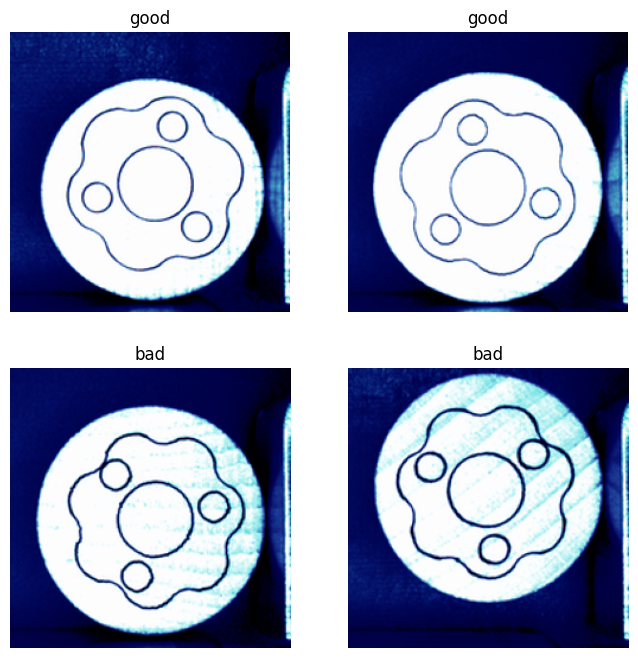

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Found 110 files belonging to 2 classes.
Using 88 files for training.


2023-11-15 21:24:32.699817: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Found 110 files belonging to 2 classes.
Using 22 files for validation.


In [ ]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
  
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_contrast = tf.image.stateless_random_contrast(
      image, lower=0.1, upper=0.9, seed=seed)
    visualize(image, stateless_random_contrast)

In [11]:
from tensorflow.keras.backend import clear_session
clear_session()
"""
1. Resizing 将图像大小调整至统一尺寸
2. RandomFlip 随机反转图像以进行数据增强
3. RandomRotation 随机旋转图像以进行数据增强
4. adjust_brightness 更改图像亮度
5. tf.image.stateless_random_brightness
tf.image.stateless_random_contrast
tf.image.stateless_random_flip_left_right
tf.image.stateless_random_flip_up_down
tf.image.stateless_random_hue
tf.image.stateless_random_saturation
"""

model = tf.keras.Sequential([
    layers.Resizing(img_height, img_width, name="resizing", input_shape=(224, 224, 3)),
    layers.Rescaling(1./255, name="rescaling"),
    layers.RandomFlip("horizontal_and_vertical", name="flip"),
    layers.RandomRotation(0.2, name="rotation"),
    layers.RandomBrightness(factor=0.2, name="brightness"),
    layers.RandomContrast(factor=0.2, name="contrast"),
    # Resizing(320, 320, name="resize", input_shape=(320, 320, 3)),
    # Rescaling(1.0 / 255, name="rescale"),
    layers.Conv2D(filters=64, kernel_size=(3, 3), data_format="channels_last", activation="relu", name="conv2d1"),
    layers.MaxPool2D(pool_size=(2, 2), name="maxpool2d_1"),
    layers.Conv2D(filters=128, kernel_size=(3, 3), data_format="channels_last", activation="relu", name="conv2d2"),
    layers.MaxPool2D(pool_size=(2, 2), name="maxpool2d_2"),
    layers.Conv2D(filters=128, kernel_size=(3, 3), data_format="channels_last", activation="relu", name="conv2d3"),
    layers.MaxPool2D(pool_size=(2, 2), name="maxpool2d_3"),
    layers.Conv2D(filters=64, kernel_size=(3, 3), data_format="channels_last", activation="relu", name="conv2d4"),
    layers.MaxPool2D(pool_size=(2, 2), name="maxpool2d_4"),
    layers.Conv2D(filters=32, kernel_size=(3, 3), data_format="channels_last", activation="relu", name="conv2d5"),
    layers.MaxPool2D(pool_size=(2, 2), name="maxpool2d_5"),
    layers.Conv2D(filters=16, kernel_size=(3, 3), data_format="channels_last", activation="relu", name="conv2d6"),
    layers.MaxPool2D(pool_size=(2, 2), name="maxpool2d_6"),
    layers.Flatten(data_format="channels_last", name="flatten_7"),
    layers.Dense(units=16, activation="relu", name="dense_7"),
    layers.Dense(units=2, activation="sigmoid", name="dense_8")
], name="pic_clf")
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)
model.build()
model.summary()

Model: "pic_clf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 320, 320, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 320, 320, 3)       0         
                                                                 
 flip (RandomFlip)           (None, 320, 320, 3)       0         
                                                                 
 rotation (RandomRotation)   (None, 320, 320, 3)       0         
                                                                 
 brightness (RandomBrightne  (None, 320, 320, 3)       0         
 ss)                                                             
                                                                 
 contrast (RandomContrast)   (None, 320, 320, 3)       0         
                                                           